# Loan approval Predicition using machine learning

This notebook looks into various Python-based machine learning and data science 

libraries in an attempt to build a machine learning model capable of predicting 

whether or not to approve loan .


we're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation 
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given financial parameters about a customer , can we predict whether or not to approve
loan ?

## 2. Data
The original data came from the Kaggle .
https://www.kaggle.com/datasets/ninzaami/loan-predication

## 3. Evaluation

> If we van reach good accuracy at predicting whether or not to approve loan.
> Then we'll pursue the project

## 4. Features
This is where you'll get different information about each of the features in your 
data.

**Create data dictionary**

* Loan_id - Uniques values .
* Gender - Male or female.
* Married - True or False
* Dependents - Number of dependents
* Education - Applicant Education (Graduate/ Under Graduate)
* Self_Employed - Self employed (y/n)
* ApplicantIncome - Applicant income
* CoapplicantIncome - Coapplicant income
* LoanAmount - Loan amount 
* Loan_Amount_term - Term of loan in months
* Credit_History - Credit history meets guidelines
* property_Area - Urban/Semi Urban/Rural
* Loan_status - (Target) Loan approved (y/n)






## Preparing the tools 

We're going to use pandas, matplotlib and Numpy for data analysis and manipulation.


In [73]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
# WE want our plots to appear inside the notebook

# Models from Scikit-Learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier



# Model Evaluations 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve , classification_report ,  confusion_matrix


## Load data

In [74]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df.shape  # (rows , columns)

(614, 13)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset we working with. 

1. What questions are you trying to solve ?
2. What kind of data do we have and how do we treat different types ?
3. What's missing from the data and how do you deal with it ?
4. How can you add, change or remove features to get more out of your data ?


In [75]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [76]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [77]:
# let 's find out how many of each class there
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

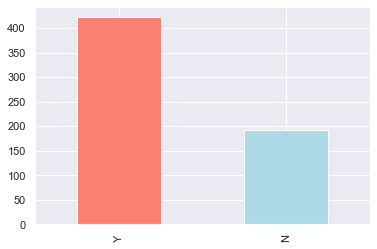

In [78]:
df["Loan_Status"].value_counts().plot(kind = "bar" , color = ["salmon" , "lightblue"])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [80]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


 Taking important feature into consideration


## Loan_status according to Gender

In [82]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [83]:
# compare target columns with gender column
pd.crosstab(df.Loan_Status , df.Gender)

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


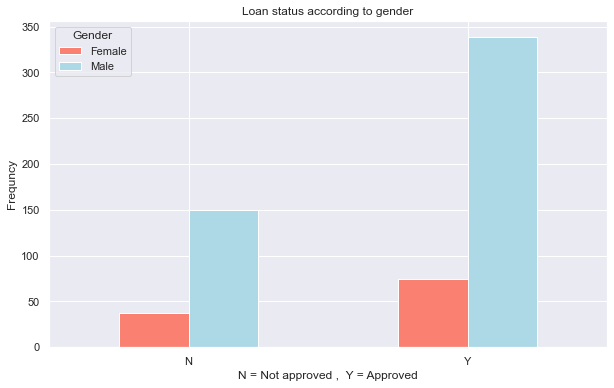

In [84]:
# Create a plot of crosstab
pd.crosstab(df.Loan_Status , df.Gender).plot(kind= "bar" , figsize = (10 ,6) , color = ["salmon" , "lightblue"])

plt.title("Loan status according to gender")
plt.xlabel("N = Not approved ,  Y = Approved")
plt.ylabel("Frequncy")
plt.xticks(rotation = 0);

## Loan status according marital status

In [85]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [86]:
# compare target columns with Married
pd.crosstab(df.Loan_Status , df.Married)

Married,No,Yes
Loan_Status,,
N,79,113
Y,134,285


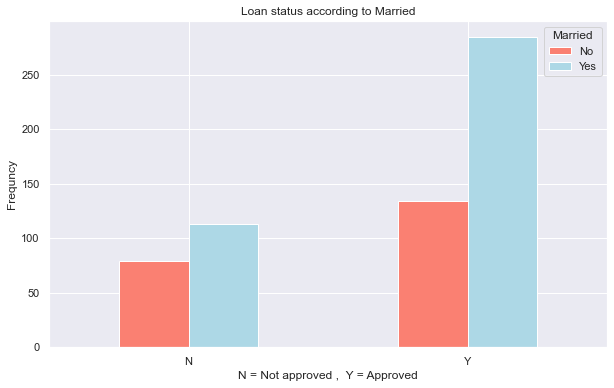

In [87]:
# Create a plot of crosstab
pd.crosstab(df.Loan_Status , df.Married).plot(kind= "bar" , figsize = (10 ,6) , color = ["salmon" , "lightblue"])

plt.title("Loan status according to Married")
plt.xlabel("N = Not approved ,  Y = Approved")
plt.ylabel("Frequncy")
plt.xticks(rotation = 0);

## Loan status according Dependents

In [88]:
# compare target columns with Dependents
pd.crosstab(df.Loan_Status , df.Dependents)

Dependents,0,1,2,3+
Loan_Status,,,,
N,107,36,25,18
Y,238,66,76,33


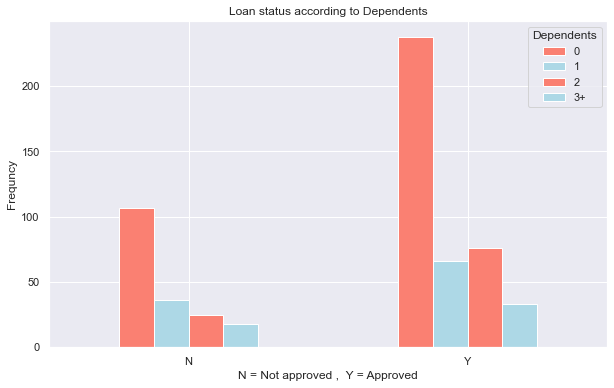

In [89]:
# Create a plot of crosstab
pd.crosstab(df.Loan_Status , df.Dependents).plot(kind= "bar" , figsize = (10 ,6) , color = ["salmon" , "lightblue"])

plt.title("Loan status according to Dependents")
plt.xlabel("N = Not approved ,  Y = Approved")
plt.ylabel("Frequncy")
plt.xticks(rotation = 0);

## Loan status according to Education

In [90]:
# compare target columns with Eduction
pd.crosstab(df.Loan_Status , df.Education)

Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


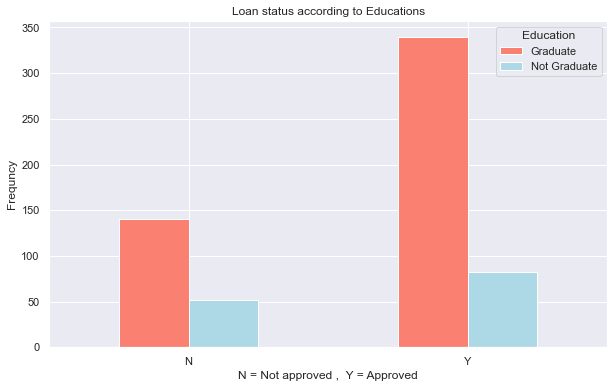

In [91]:
# Create a plot of crosstab
pd.crosstab(df.Loan_Status , df.Education).plot(kind= "bar" , figsize = (10 ,6) , color = ["salmon" , "lightblue"])

plt.title("Loan status according to Educations")
plt.xlabel("N = Not approved ,  Y = Approved")
plt.ylabel("Frequncy")
plt.xticks(rotation = 0);

In [92]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## loan status whether person is self_employed or not

In [93]:
# compare target columns with self_employed
pd.crosstab(df.Loan_Status , df.Self_Employed)

Self_Employed,No,Yes
Loan_Status,,
N,157,26
Y,343,56


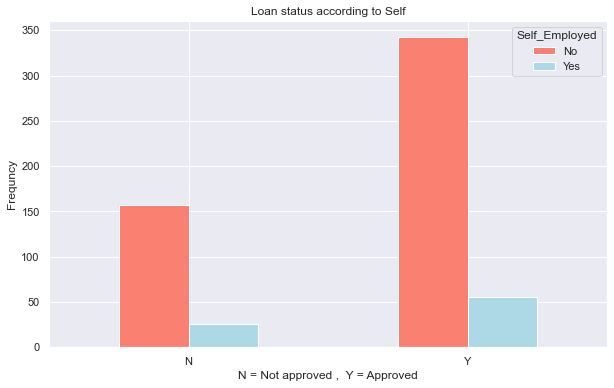

In [94]:
# Create a plot of crosstab
pd.crosstab(df.Loan_Status , df.Self_Employed).plot(kind= "bar" , figsize = (10 ,6) , color = ["salmon" , "lightblue"])

plt.title("Loan status according to Self")
plt.xlabel("N = Not approved ,  Y = Approved")
plt.ylabel("Frequncy")
plt.xticks(rotation = 0);

## Loan status based on Credit_History

In [95]:
# compare target columns with Credit_History
pd.crosstab(df.Loan_Status , df.Credit_History)

Credit_History,0.0,1.0
Loan_Status,,
N,82,97
Y,7,378


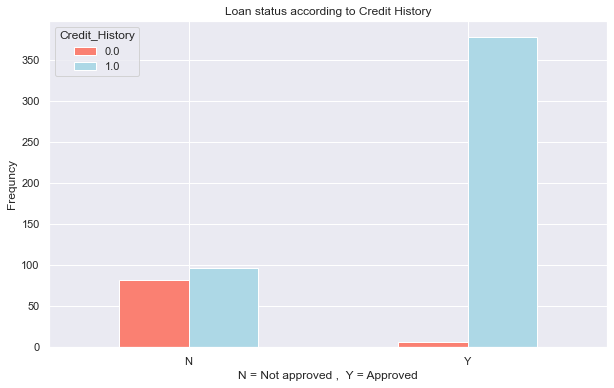

In [96]:
# Create a plot of Credit_Histroy
pd.crosstab(df.Loan_Status , df.Credit_History).plot(kind= "bar" , figsize = (10 ,6) , color = ["salmon" , "lightblue"])

plt.title("Loan status according to Credit History")
plt.xlabel("N = Not approved ,  Y = Approved")
plt.ylabel("Frequncy")
plt.xticks(rotation = 0);

## Loan Status based on Property_Area

In [97]:
# compare target columns with Property Area
pd.crosstab(df.Loan_Status , df.Property_Area)

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,69,54,69
Y,110,179,133


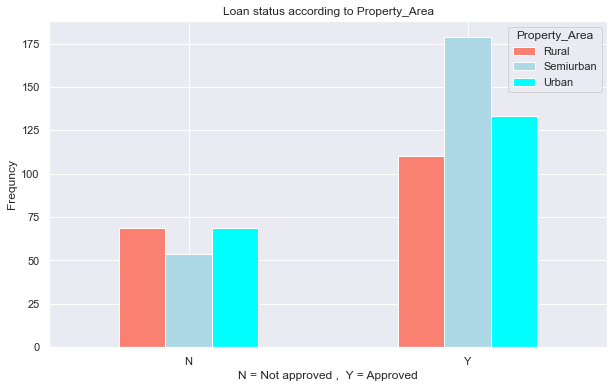

In [98]:
# Create a plot of Property_Area
pd.crosstab(df.Loan_Status , df.Property_Area).plot(kind= "bar" , figsize = (10 ,6) , color = ["salmon" , "lightblue" ,"cyan"])

plt.title("Loan status according to Property_Area")
plt.xlabel("N = Not approved ,  Y = Approved")
plt.ylabel("Frequncy")
plt.xticks(rotation = 0);

### Applicant Income

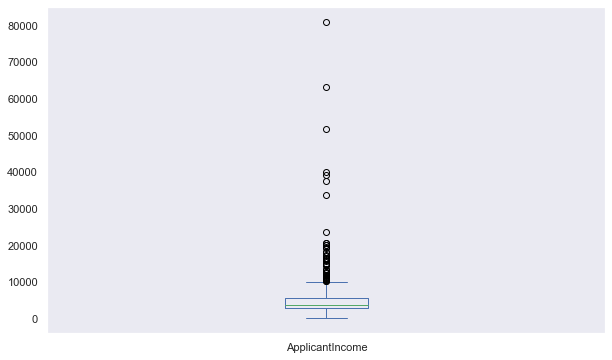

In [99]:
df["ApplicantIncome"].plot(kind = "box" ,figsize = (10,6)).grid() # there lot of outliers

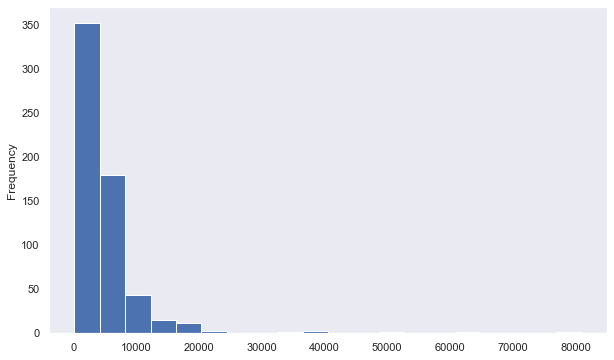

In [100]:
df["ApplicantIncome"].plot(kind = "hist" ,bins = 20,figsize = (10,6) ).grid()

Both Applicant income and CoapplicantIncome is right skewed so we have to normalized them

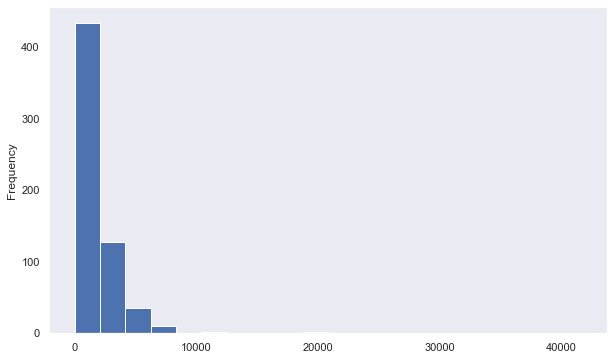

In [101]:
df["CoapplicantIncome"].plot(kind = "hist" , bins = 20 ,figsize = (10,6)).grid()

### Relation between ApplicantIncome and their Education

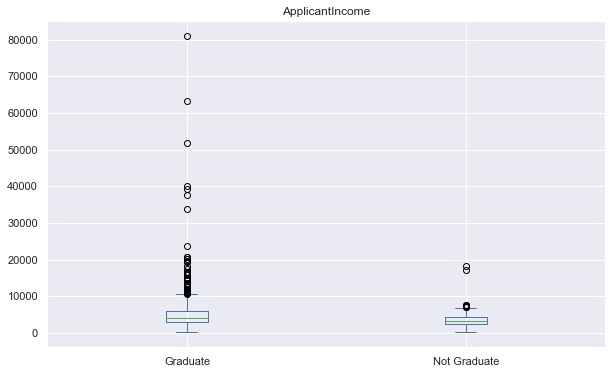

In [102]:
df.plot(kind = "box" ,column = "ApplicantIncome" , by = "Education" , figsize = (10,6));

# Loan Amount

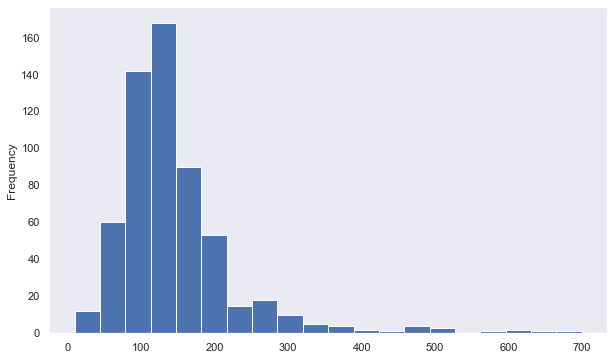

In [103]:
df["LoanAmount"].plot(kind = "hist" , bins = 20 , figsize = (10 ,6)).grid()

# Creating Heatmap

<AxesSubplot:>

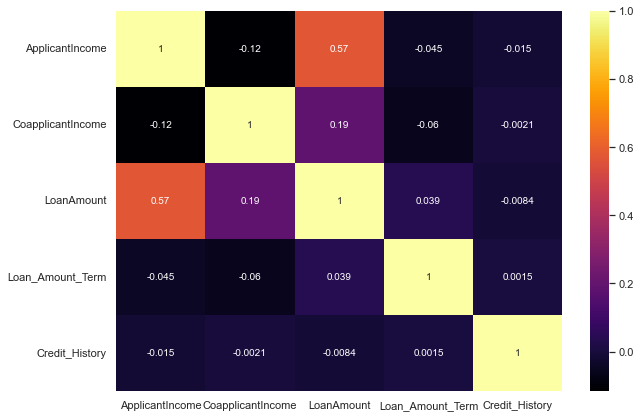

In [104]:
plt.figure(figsize = (10 , 7))
sns.heatmap(df.corr() , annot = True , cmap = "inferno")

## Data preprocessing

In [105]:
# Drop Unecessary Variables 
df.drop("Loan_ID", axis= 1 ,inplace= True)

In [106]:
# Checking if any null values
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Handeling missing and null values (DATA IMPUTATION)


filling categorical values

In [107]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace= True)  ## as it is series so we get value using [00]
df["Married"].fillna(df["Married"].mode()[0], inplace= True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace= True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace= True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0] , inplace= True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

filling non - categorical values

In [108]:
df["LoanAmount"].fillna(df["LoanAmount"].mean() , inplace= True )

In [109]:
## Check if again if any missing value left
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

 ## One-hot Encoding 
 * In this section, I will transform categorical variables into a form that could be provided by ML algorithms to do a better prediction.

In [110]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

 Remove Outliers & Infinite values

In [111]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Skewed Distribution Treatment
* In previous section, it already shown that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed.
* I will use square root transformation to normalized the distribution.

In [112]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

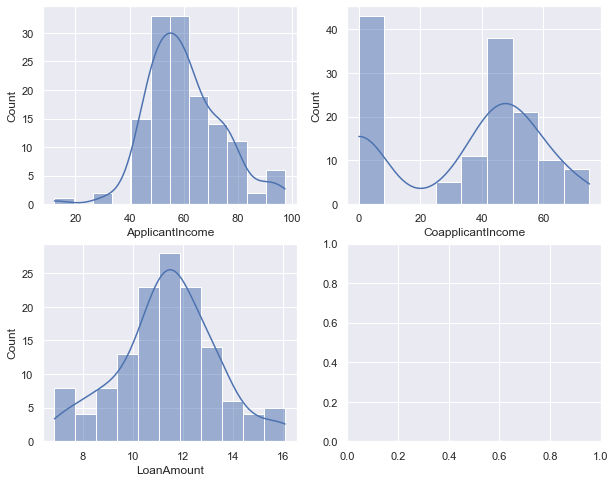

In [113]:
# Check again is data is normalize
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0])

sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1])

sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0])

### Features Separating

In [114]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

 ### SMOTE Technique
In previous exploration, it can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting,

In [115]:
X, y = SMOTE().fit_resample(X, y)

### Data Normalization 
* In this section, data normalization will be performed to normalize the range of independent variables or features of data.

In [116]:
X = MinMaxScaler().fit_transform(X)
X

array([[0.75334456, 0.        , 0.56771332, ..., 0.        , 0.        ,
        1.        ],
       [0.7648493 , 0.        , 0.54327603, ..., 0.        , 0.        ,
        1.        ],
       [0.3612302 , 0.71055534, 0.41367148, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.7136423 , 0.        , 0.39391481, ..., 0.        , 0.        ,
        0.        ],
       [0.55920636, 0.        , 0.27415505, ..., 0.        , 0.        ,
        1.        ],
       [0.64190924, 0.63737797, 0.47098446, ..., 0.        , 0.        ,
        0.        ]])

### Splitting Data Set 
* The data set will be split into 80% train and 20% test.

In [117]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [118]:
print( X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(179, 16) (45, 16)
(179,) (45,)


## Models

In [119]:
# Put models in adictionary
model_score = {}

# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier() ,
          "SVM" : SVC() ,
          "Gradient Boost" : GradientBoostingClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):

    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """

    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():

        # Fit the model to the data
        model.fit(X_train, y_train)

        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [120]:
import warnings
warnings.filterwarnings("ignore")

In [121]:
# Calling fit_and_score function

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8,
 'Random Forest': 0.8666666666666667,
 'SVM': 0.8,
 'Gradient Boost': 0.8222222222222222}

# model comparision 1

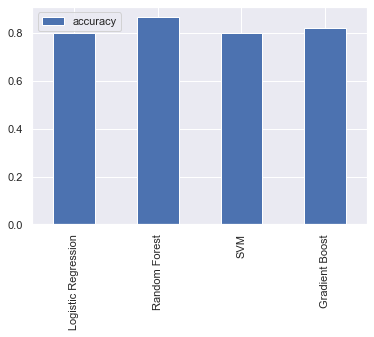

In [122]:
model_compare = pd.DataFrame(model_scores , index = ["accuracy"])
model_compare.T.plot.bar();

# Hyperparameter Tunning

In [123]:
# creating dictionary to store tunned model accuracy
tuned_acc = {}

In [124]:
# creating dictionary to store tunned model accuracy
tuned_acc = {}

# fit 
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)

tuned_acc["SVM"] = SVCAcc
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.76      0.86      0.81        22

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45

[[17  6]
 [ 3 19]]
SVC accuracy: 80.00%


In [125]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
tuned_acc["LogisticRegression"] = LRAcc
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.78      0.82      0.80        22

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45

[[18  5]
 [ 4 18]]
LR accuracy: 80.00%


In [126]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
RFacc = max(scoreListRF)
tuned_acc["RandomForestClassifer"] = RFacc
print('RFC accuracy: {:.2f}%'.format(RFacc*100))

RFC accuracy: 88.89%


## Hyperparameter tunning with randomizedsearchCV

In [127]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}
      
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20 ,verbose = 1)
GB.fit(X_train, y_train)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]},
                   verbose=1)

In [128]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_leaf_nodes=10, subsample=1)
0.8104166666666666
{'subsample': 1, 'n_estimators': 100, 'max_leaf_nodes': 10, 'max_depth': 3}
2


# putting best param in model

In [129]:
GBclassifier = GradientBoostingClassifier(subsample= 1, n_estimators=200, max_depth=5, max_leaf_nodes=50)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
tuned_acc["Gradinet Boosting"] = GBAcc
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.77      0.77      0.77        22

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45

[[18  5]
 [ 5 17]]
Gradient Boosting accuracy: 77.78%


# model Comparison final

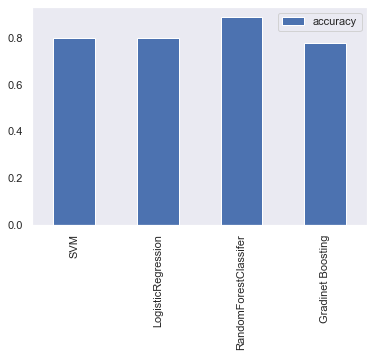

In [136]:
model_compare = pd.DataFrame(tuned_acc , index = ["accuracy"] )
model_compare.T.plot.bar( ).grid();